# Anomaly Detection Part 1 - Level Shift For Time Series Data 

### A Simple Example of Level Shift 

In this example:

The time series has a level shift at 
𝑡
=
100
t=100 where the mean jumps from 0 to 5.
The moving average smooths the time series, and a sudden change in the rolling mean signals a potential level shift.

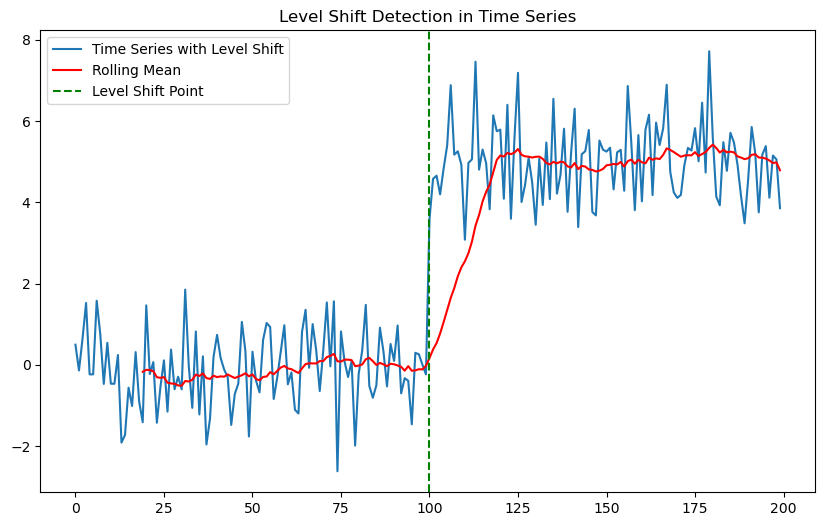

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Simulate time series with level shift
np.random.seed(42)
n = 200
time = np.arange(n)
data = np.random.normal(loc=0, scale=1, size=n)
data[100:] += 5  # Introduce a level shift at t=100

# Detect level shift using moving average
window_size = 20
rolling_mean = np.convolve(data, np.ones(window_size)/window_size, mode='valid')

# Plot original time series and rolling mean
plt.figure(figsize=(10,6))
plt.plot(time, data, label="Time Series with Level Shift")
plt.plot(time[window_size-1:], rolling_mean, label="Rolling Mean", color='red')
plt.axvline(x=100, color='green', linestyle='--', label="Level Shift Point")
plt.title("Level Shift Detection in Time Series")
plt.legend()
plt.show()


### Anomaly pts in Regular Periodic Data 

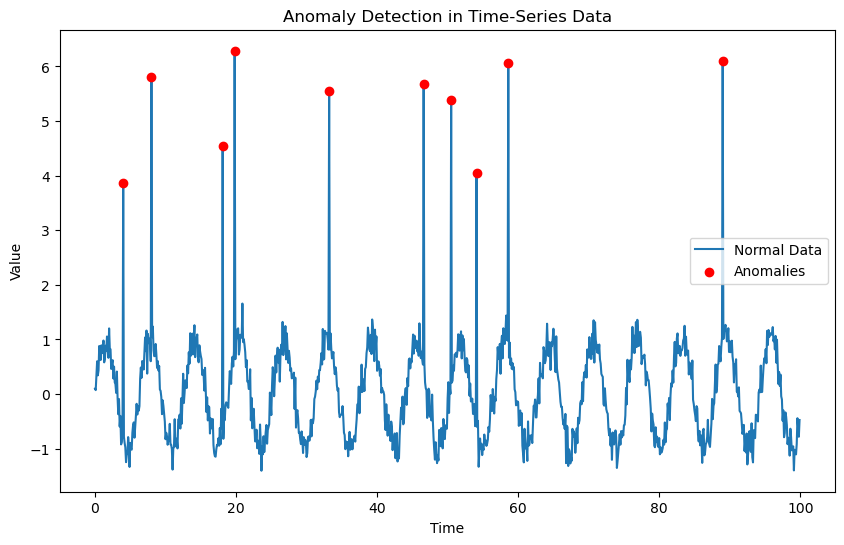

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Generate synthetic time-series data
np.random.seed(42)
time = np.arange(0, 100, 0.1)
data = np.sin(time) + np.random.normal(0, 0.2, len(time))  # normal data
anomalies = np.random.choice(np.arange(len(data)), size=10, replace=False)  # inject anomalies
data[anomalies] += np.random.normal(5, 0.5, len(anomalies))  # exaggerated anomaly spikes

# Plot the data with anomalies marked
plt.figure(figsize=(10, 6))
plt.plot(time, data, label='Normal Data')
plt.scatter(time[anomalies], data[anomalies], color='red', label='Anomalies', zorder=5)
plt.title('Anomaly Detection in Time-Series Data')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()



### A Simple Time Series with Level Shift 

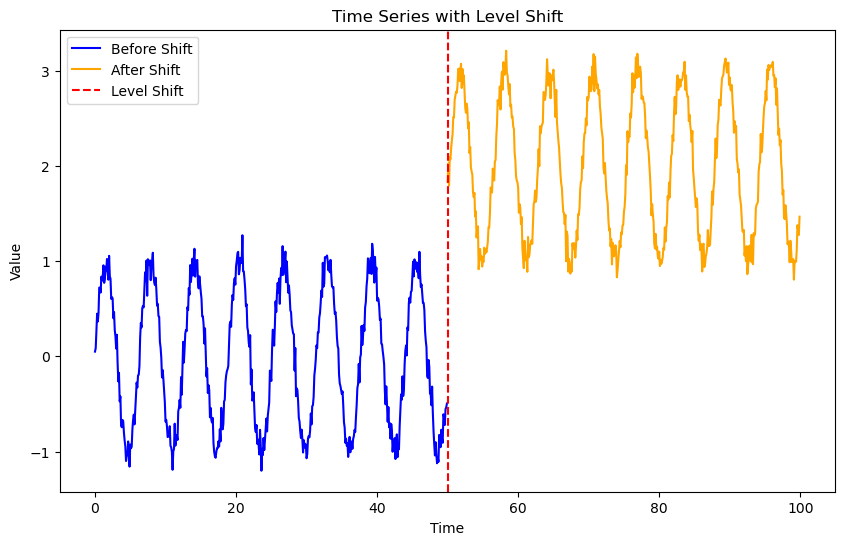

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic time-series data with a level shift
np.random.seed(42)
time = np.arange(0, 100, 0.1)

# First part of the time series (normal level)
data_before_shift = np.sin(time[:500]) + np.random.normal(0, 0.1, len(time[:500]))

# Second part of the time series (shifted level)
data_after_shift = np.sin(time[500:]) + 2 + np.random.normal(0, 0.1, len(time[500:]))

# Combine the two parts to create a full time-series with a level shift
data = np.concatenate([data_before_shift, data_after_shift])

# Plot the time-series with different colors for before and after the level shift
plt.figure(figsize=(10, 6))
plt.plot(time[:500], data_before_shift, label='Before Shift', color='blue')
plt.plot(time[500:], data_after_shift, label='After Shift', color='orange')
plt.axvline(x=time[500], color='red', linestyle='--', label='Level Shift')
plt.title('Time Series with Level Shift')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


### A Cyclic Time Series with Level Shift 

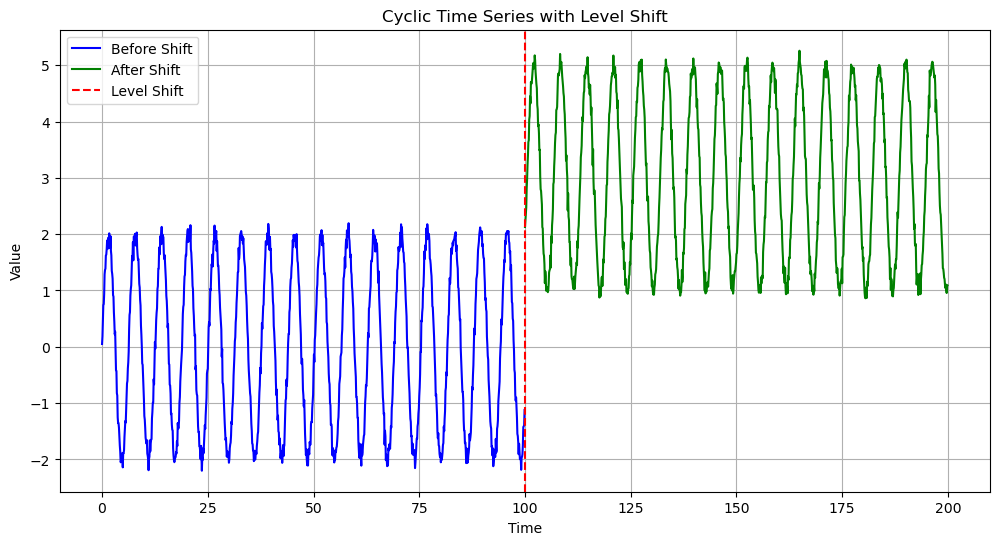

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic cyclic time-series data with a level shift
np.random.seed(42)
time = np.arange(0, 200, 0.1)

# First part of the cyclic time series (before level shift)
cyclic_before_shift = 2 * np.sin(time[:1000]) + np.random.normal(0, 0.1, len(time[:1000]))

# Second part of the cyclic time series (after level shift)
cyclic_after_shift = 2 * np.sin(time[1000:]) + 3 + np.random.normal(0, 0.1, len(time[1000:]))

# Combine the two parts to create a cyclic time-series with a level shift
cyclic_data = np.concatenate([cyclic_before_shift, cyclic_after_shift])

# Plot the cyclic time-series with different colors for before and after the level shift
plt.figure(figsize=(12, 6))
plt.plot(time[:1000], cyclic_before_shift, label='Before Shift', color='blue')
plt.plot(time[1000:], cyclic_after_shift, label='After Shift', color='green')
plt.axvline(x=time[1000], color='red', linestyle='--', label='Level Shift')
plt.title('Cyclic Time Series with Level Shift')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


### Uptrending Time Series with Level Shift

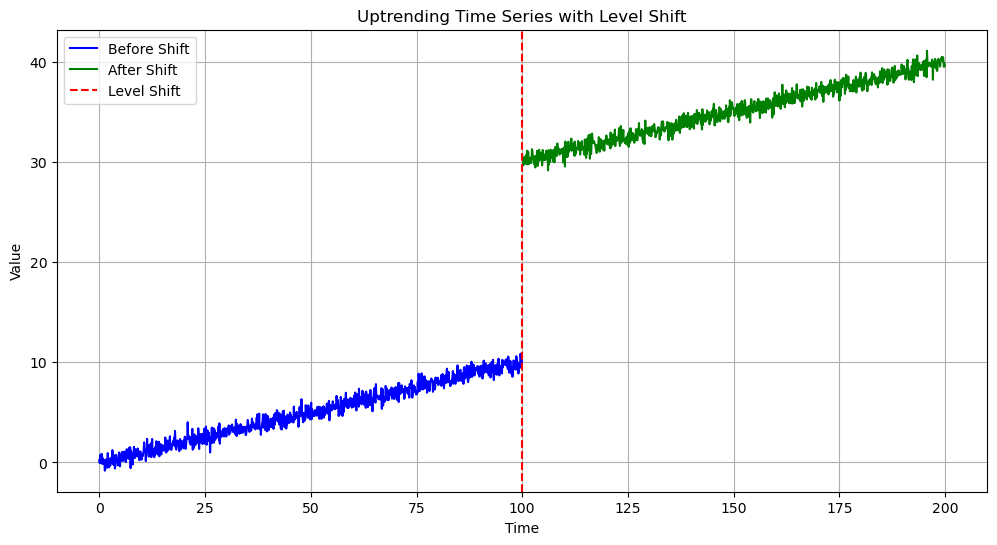

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Generate an uptrending time series
np.random.seed(42)
time = np.arange(0, 200, 0.1)

# Uptrend before the level shift
uptrend_before_shift = 0.1 * time[:1000] + np.random.normal(0, 0.5, len(time[:1000]))

# Uptrend after the level shift (with an upward shift)
level_shift_value = 20  # The amount of shift in the data
uptrend_after_shift = 0.1 * time[1000:] + level_shift_value + np.random.normal(0, 0.5, len(time[1000:]))

# Combine the two parts to create an uptrending time series with a level shift
uptrend_data = np.concatenate([uptrend_before_shift, uptrend_after_shift])

# Plot the uptrending time series with different colors before and after the level shift
plt.figure(figsize=(12, 6))
plt.plot(time[:1000], uptrend_before_shift, label='Before Shift', color='blue')
plt.plot(time[1000:], uptrend_after_shift, label='After Shift', color='green')
plt.axvline(x=time[1000], color='red', linestyle='--', label='Level Shift')
plt.title('Uptrending Time Series with Level Shift')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


### Level Shift Detection with Rolling Mean in Time Series 

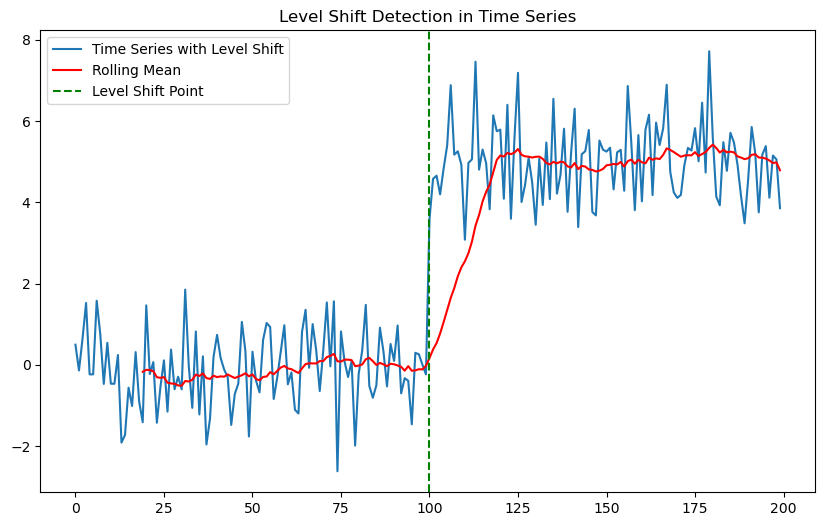

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Simulate time series with level shift
np.random.seed(42)
n = 200
time = np.arange(n)
data = np.random.normal(loc=0, scale=1, size=n)
data[100:] += 5  # Introduce a level shift at t=100

# Detect level shift using moving average
window_size = 20
rolling_mean = np.convolve(data, np.ones(window_size)/window_size, mode='valid')

# Plot original time series and rolling mean
plt.figure(figsize=(10,6))
plt.plot(time, data, label="Time Series with Level Shift")
plt.plot(time[window_size-1:], rolling_mean, label="Rolling Mean", color='red')
plt.axvline(x=100, color='green', linestyle='--', label="Level Shift Point")
plt.title("Level Shift Detection in Time Series")
plt.legend()
plt.show()


## End of Notebook